In [13]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#data preperation

np.random.seed(0)
n_hours = 24
time_index = pd.date_range('2024-11-01', periods=n_hours, freq='h')

vehicle_type = ['car', 'bike', 'auto', 'bus', 'truck']
base_vol = 100

seasonal_variation = 20 * np.sin(np.linspace(0, 3 * np.pi, n_hours))
noise = np.random.normal(0, 5, n_hours)

In [15]:
#dataset

traffic_data = pd.DataFrame(index=time_index)

for vehicle in vehicle_type:
    vehicle_vol = (base_vol + seasonal_variation + noise + np.random.normal(0, 10, n_hours))
    vehicle_vol = np.maximum(vehicle_vol, 0)

    traffic_data[vehicle] = vehicle_vol

print(traffic_data.head())

                            car        bike        auto         bus  \
2024-11-01 00:00:00  131.517808   92.681283  120.214269  108.925262   
2024-11-01 01:00:00   95.425151  107.841405   97.620550  127.827513   
2024-11-01 02:00:00  119.967994  110.555744  123.533826  120.779530   
2024-11-01 03:00:00  128.177846  133.918709  123.201584  134.069578   
2024-11-01 04:00:00  144.618957  124.183114  120.583194  148.122672   

                          truck  
2024-11-01 00:00:00  112.584517  
2024-11-01 01:00:00   98.974800  
2024-11-01 02:00:00  122.492791  
2024-11-01 03:00:00  143.313543  
2024-11-01 04:00:00  122.345487  


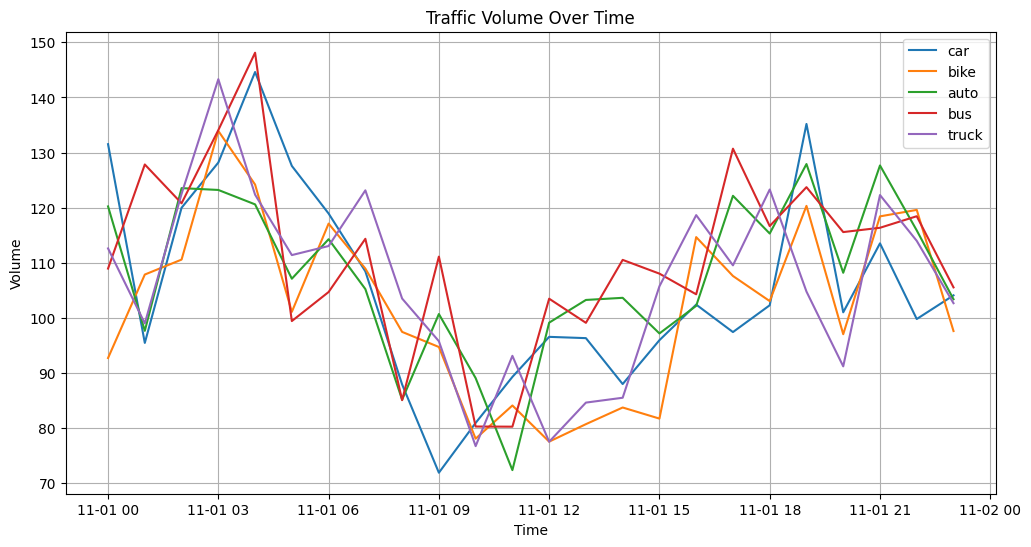

In [16]:
#visualization

plt.figure(figsize=(12, 6))
for vehicle in vehicle_type:
    plt.plot(traffic_data.index, traffic_data[vehicle], label=vehicle)

plt.title('Traffic Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

In [17]:
#save dataset

traffic_data.to_csv('traffic_data.csv')